# Cobining Thresholds
In this interactive jupyter notebook you can explore the effect of the threshold limits and kernel sizes for different gradients and see their combined effect on an image in order to detect lane lines.

## Instructions:
* Run all cells.
* Adjust min, max and ksize for the four different gradients.
* Re-run the last cell to see their combined effect.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import widgets

%matplotlib inline

In [6]:
def abs_sobel_thresh(img, orient='x', thresh=(0,255), sobel_kernel=3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return sobel_binary


def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    mag = np.sqrt(np.square(sobelx) + np.square(sobely))
    scaled_mag = np.uint8(255*mag/np.max(mag))
    smbinary = np.zeros_like(scaled_mag)
    smbinary[(scaled_mag >= mag_thresh[0]) & (scaled_mag <= mag_thresh[1])] = 1
    return smbinary


def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    dir = np.arctan2(abs_sobely,abs_sobelx)
    dirbinary = np.zeros_like(dir)
    dirbinary[(dir >= thresh[0]) & (dir <= thresh[1])] = 1
    return dirbinary

In [7]:
img = mpimg.imread('signs_vehicles_xygrad.png')

<function __main__.plt_gradx>

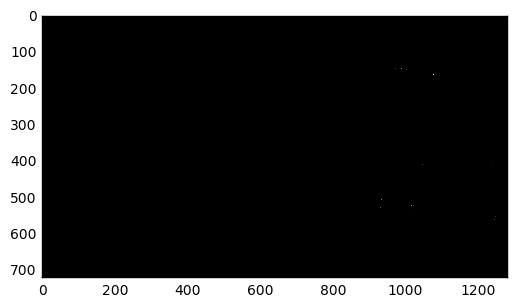

In [8]:
min_gradx = 0
max_gradx = 255
ksize_gradx = 15

def plt_gradx(min, max, ksize):
    global min_gradx, max_gradx, ksize_gradx
    min_gradx = min
    max_gradx = max
    ksize_gradx = ksize
    gradx = abs_sobel_thresh(img, orient='x', sobel_kernel=ksize, thresh=(min,max))
    f, ax = plt.subplots(1,1)
    ax.imshow(gradx,cmap='gray')
                                                 
widgets.interact(plt_gradx, min=(0,255,1), max=(0,255,1), ksize=(3,31,2))      

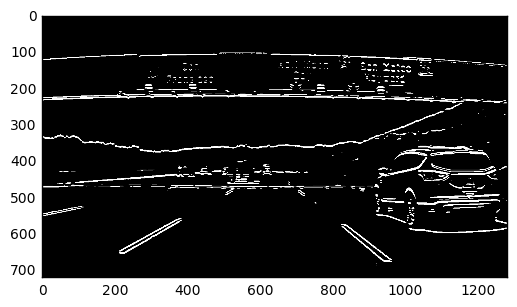

In [9]:
min_grady = 0
max_grady = 255
ksize_grady = 15

def plt_grady(min, max, ksize):
    global min_grady, max_grady, ksize_grady
    min_grady = min
    max_grady = max
    ksize_grady = ksize
    grady = abs_sobel_thresh(img, orient='y', sobel_kernel=ksize, thresh=(min,max))
    f, ax = plt.subplots(1,1)
    ax.imshow(grady,cmap='gray')
                                                 
%matplotlib inline
widgets.interact(plt_grady, min=(0,255,1), max=(0,255,1), ksize=(3,31,2))


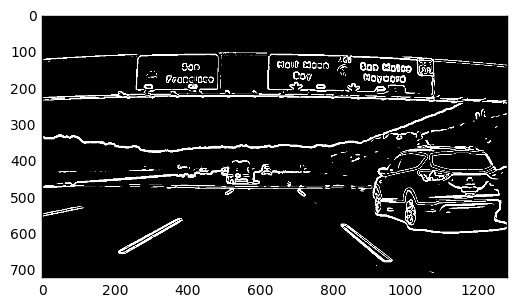

In [6]:
min_mag = 0
max_mag = 255
ksize_mag = 15

def plt_mag_binary(min, max, ksize):
    global min_mag, max_mag, ksize_mag
    min_mag = min
    max_mag = max
    ksize_mag = ksize
    mag_binary = mag_thresh(img, sobel_kernel=ksize, mag_thresh=(min, max))
    f, ax = plt.subplots(1,1)
    ax.imshow(mag_binary,cmap='gray')
                                                 
%matplotlib inline
                             
widgets.interact(plt_mag_binary, min=(0,255,1), max=(0,255,1), ksize=(3,31,2))

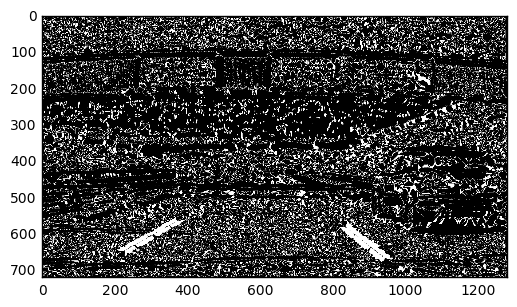

In [7]:
%matplotlib inline

min_dir = 0
max_dir = 255
ksize_dir = 15

def plt_dir_binary(min, max, ksize):
    global min_dir, max_dir, ksize_dir
    min_dir = min
    max_dir = max
    ksize_dir = ksize 
    dir_binary = dir_threshold(img, sobel_kernel=ksize, thresh=(min,max))
    f, ax = plt.subplots(1,1)
    ax.imshow(dir_binary,cmap='gray')
                                                                              
widgets.interact(plt_dir_binary, min=(0.0,np.pi/2,np.pi/256), max=(0.0,np.pi/2,np.pi/256), ksize=(3,31,2))

In [16]:
%matplotlib inline

# Thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255), channel=2):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#     H = hls[:,:,0]
#     L = hls[:,:,1]
#     S = hls[:,:,2]
    print('channel=', channel)
    sel_channel = hls[:,:,channel]
    # 2) Apply a threshold to the S channel
    bin = np.zeros_like(sel_channel)
    bin[(sel_channel > thresh[0]) & (sel_channel <= thresh[1])] = 1
    print('mean =', np.mean(bin))
    return bin

min_s = 0
max_s = 255
channel_num = 2

def plt_color_binary(min, max, channel):
    global min_s, max_s, channel_num
    min_s = min
    max_s = max
    channel_num = channel
    s_binary = hls_select(img, thresh=(min,max), channel=channel)
    f, ax = plt.subplots(1,1)
    ax.imshow(s_binary,cmap='gray')
                                                                              
widgets.interact(plt_color_binary, min=(0,255,1), max=(0,255,1), channel=(0,2,1))

channel= 2
mean = 0.989499


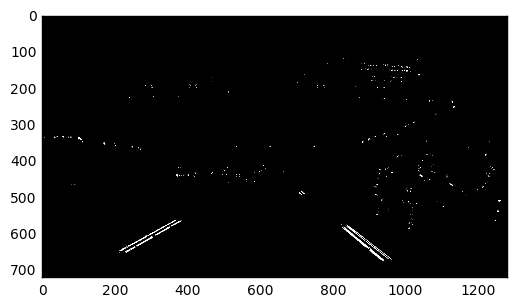

In [13]:
# Apply each of the thresholding functions
gradx = abs_sobel_thresh(img, orient='x', sobel_kernel=ksize_gradx, thresh=(min_gradx, max_gradx))
grady = abs_sobel_thresh(img, orient='y', sobel_kernel=ksize_grady, thresh=(min_grady, max_grady))
mag_binary = mag_thresh(img, sobel_kernel=ksize_mag, mag_thresh=(min_mag, max_mag))
dir_binary = dir_threshold(img, sobel_kernel=ksize_dir, thresh=(min_dir, max_dir))

combined = np.zeros_like(dir_binary)
# combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
combined[((gradx == 1) & (grady == 1) & (mag_binary == 1) & (dir_binary == 1))] = 1

f, ax = plt.subplots(1,1)
ax.imshow(combined,cmap='gray')